### Matematika z računalnikom

#### Projektna naloga : Napovedovanje cen avtomobilov na avtonetu

##### Rok Stanič

### Opis problema

Za seminarsko nalogo sem pripravil model za ocenjevanje oglaševane cene avtomobila na spletni strani avtonet. Cilj modela je, s pomočjo podatkov, ki sem jih pridobil iz avtoneta, oceniti pričakovano vrednost cene po kateri se avto oglašuje. Model bi bil na spletni strani lahko aplikativen, kot pomoč kupcu oz. uporabniku pri temu, če gre za ugodno ponudbo glede na primerljive avtomobile, ki so se na strani prodajali.

Model je za navdih vzel algoritem KNN, vendar zaradi specifične narave problema ter relativno majhnega števila podatkov sem algoritem nekoliko prilagodil danemu problem. Metoda KNN se mi je zdela primerna, saj želimo najti podobne avtomobile, ki so se na trgu prodajali.

### Pridobivanje podatkov

Podatke za model so se pridobili iz spletne strani https://www.avto.net. Na omenjeni strani vsakemu avtu / pomoženmu delu / pnevmatiki dodelijo ID (ki jih generirajo v zaporedju in ne naključno, kar naj ne bi bilo priporočljivo), za pridobitev podatkov se je tako potrebno zapeljati po smiselnih ID-jih in iz url-jev pridobiti html-je. Iz html-jev se nato s pomočjo knjižnic Beutiful soup in regex pridobi podatke.

Podatki ne vključujejo vzdrževanega stanja / opisa stanja v katerem je avtomobil. Posledično bo model imel težave pri napovedih za slabo vzdrževane avte ali pa avte, kjer v opisu piše da manjka motor ali kaj sorodnega temu.

Za avtomobile so tako na voljo naslednji podatki:
- Oglaševana cena
- Znamka
- Tip
- Znamka
- Leto prve registracije
- Leto proizvodnje
- Prevoženi kilometri
- Leto veljavnosti tehničnega pregleda
- Število vrat
- Poraba izven mestne vožnje
- KW
- CCM
- Gorivo
- Menjalnik
- Količina C02 emisij

Skupno število obzervacij v podatkovni množici je enako **10212**.

Podatki v končni obliki so na voljo v datoteki **Data/Final data/Final_data.xlsx". 

Originalne datoteke pridobivanja podatkov so na voljo v folderju **Data/Other/**. 

Skripta s pomočjo katere sem pridobil podatke je na voljo v **Scripts/Get avtonet data.ipynb**.

### Podatki

Spodnja tabela prikazuje osnovne statistike o podatkih.

Ostala podrobna statistika je na voljo v datoteki **Data/Final data/Data_statistics.xlsx**

In [10]:
import pandas as pd 


pd.read_excel("C:\\Users\\1roks\\Documents\\FMF\\Matematika z računalnikom\\Project\\Data\\Final data\\Data_statistics.xlsx", sheet_name = "Descriptive Statistics").drop(['level_0', 'index'], axis='columns')

,Unnamed: 0,cena,leto_prve_registracije,leto_proizvodnje,prevozeni_km,leto_veljavnosti_tehnicnega_pregleda,stevilo_vrat,kw,ccm,emisije_c02,starost,ID,ccm_class,kw_class
0,count,10212.000000,5631.000000,7718.000000,8.838000e+03,6241.000000,10212.000000,10192.000000,10192.000000,8199.000000,8584.000000,10212.000000,10212.000000,10212.000000
1,mean,14519.840776,2012.840881,2010.216248,1.710635e+05,2003.145650,4.714454,103.633046,1774.937304,139.092206,10.834692,5106.500000,5.420290,5.430180
2,std,13724.160950,5.057492,70.187727,1.022513e+05,194.726024,0.665132,42.538279,533.032953,33.393702,52.368945,2948.094809,2.794431,2.845157
3,min,100.000000,1976.000000,4.000000,1.000000e+00,1.000000,2.000000,10.000000,20.000000,11.000000,0.000000,1.000000,0.000000,0.000000
4,5%,1300.000000,2003.000000,2004.000000,2.499910e+04,2022.000000,3.000000,55.000000,999.000000,99.000000,3.000000,511.550000,1.000000,1.000000
5,25%,5300.000000,2009.000000,2009.000000,1.049065e+05,2022.000000,5.000000,77.000000,1461.000000,117.000000,5.000000,2553.750000,3.000000,3.000000
6,50%,11500.000000,2014.000000,2014.000000,1.634780e+05,2022.000000,5.000000,96.000000,1686.000000,134.000000,9.000000,5106.500000,6.000000,5.000000
7,75%,19399.250000,2017.000000,2017.000000,2.300000e+05,2023.000000,5.000000,120.000000,1995.000000,154.000000,13.000000,7659.250000,8.000000,8.000000
8,95%,37990.000000,2019.000000,2019.000000,3.300000e+05,2024.000000,5.000000,185.000000,2967.000000,198.000000,19.000000,9701.450000,10.000000,10.000000
9,max,209990.000000,2022.000000,2022.000000,2.000000e+06,2028.000000,7.000000,567.000000,6208.000000,385.000000,2018.000000,10212.000000,10.000000,10.000000


Sedaj pa si poglejmo še nekatere porazdelitve podatkov.

Text(0.5, 1.0, 'Porazdelitev avtomobilov glede na leto prve registracije')

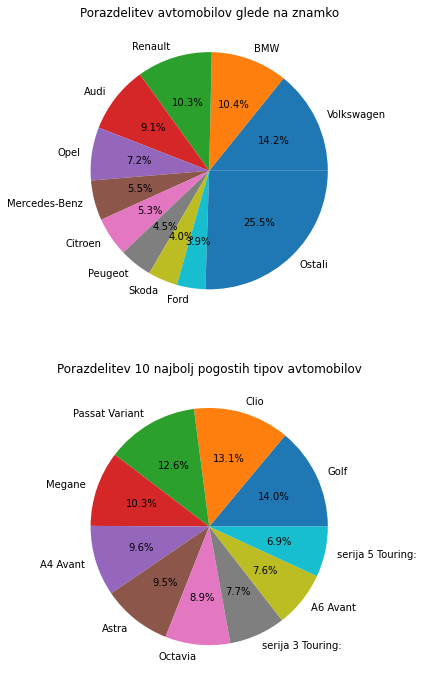

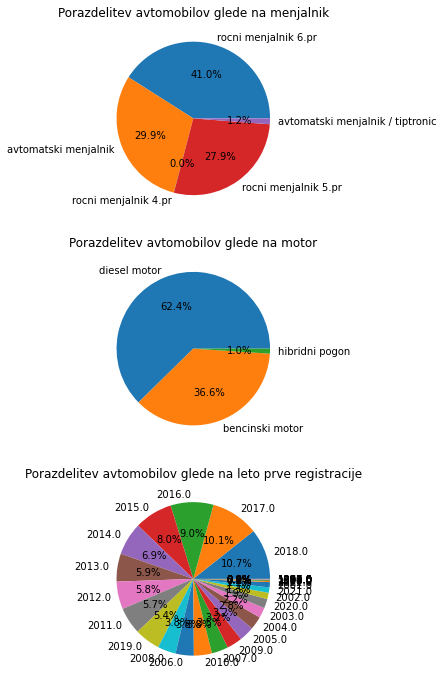

In [11]:
import matplotlib.pyplot as plt
import numpy as numpy
from plotnine import *

df = pd.read_excel("C:\\Users\\1roks\\Documents\\FMF\\Matematika z računalnikom\\Project\\Data\\Final data\\Data_statistics.xlsx" ,sheet_name ="Data")

fig, (x1,x2) = plt.subplots(2,1,figsize=(10,12)) # 10 največkrat pojavljenih 

vek_znamke = list(df['znamka'].value_counts()[0:10])
vek_znamke.append(sum(df['znamka'].value_counts()[10:len(df['znamka'].value_counts())]))
znamke = df['znamka'].value_counts().index.tolist()[0:10]
znamke.append("Ostali")
x1.pie(vek_znamke,labels=znamke , autopct='%1.1f%%')

vek_znamke = list(df['tip'].value_counts()[0:10])
znamke = df['tip'].value_counts().index.tolist()[0:10]

x2.pie(vek_znamke,labels=znamke , autopct='%1.1f%%')

x1.set_title('Porazdelitev avtomobilov glede na znamko')
x2.set_title('Porazdelitev 10 najbolj pogostih tipov avtomobilov')


fig, (x1,x2,x3) = plt.subplots(3,1,figsize=(10,12)) 

#

values = list(df['menjalnik'].value_counts())
labels = list(df['menjalnik'].value_counts().index.tolist())

myorder = [0, 1, 4, 2, 3]

values  = [values[i] for i in myorder]
labels = [labels[i] for i in myorder]

x1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie


values = list(df['gorivo'].value_counts())
labels = list(df['gorivo'].value_counts().index.tolist())



x2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie

values = list(df['leto_prve_registracije'].value_counts())
labels = list(df['leto_prve_registracije'].value_counts().index.tolist())


x3.pie(values,labels = labels,autopct = '%1.1f%%') #plot third pie

x1.set_title('Porazdelitev avtomobilov glede na menjalnik')
x2.set_title('Porazdelitev avtomobilov glede na motor')
x3.set_title('Porazdelitev avtomobilov glede na leto prve registracije')


### Povzetek algoritma

Model bo za vzor vzel algoritem regresijskih najbližjih sosedov, kjer se za razdaljo med avtomobili ne bo vzela tradicionalna evklidksa razdalja, saj je ne bi bilo mogoče izračunati. Poleg potrebe po definiciji funkcije podobnost, ima algoritem KNN še 2 ključni komponenti, prva je število sosedov glede na katere se izračuna končna ocena, druga pa način uteževanja končne vsote. Obe komponenti algoritma bom naslovil kasneje.

Za razdaljo med dvema poljubnima avtomobiloma sem definiral kompleksno funkcijo, ki med avtomobiloma na podlagi ključnih atributov izračuna razdaljo.
Algoritem bo v podatkih našel najbolj primerljive avtomobile, ter bo za oceno avtomobila vzel povprečje najbolj primerljivih avtomobilih. Ideja je posnemati metodo KNN, kjer namesto evklidske funkcije za "razdaljo" med dvemi avtomobili definiramo specifično funkcijo, ki glede na atribute izračuna mera podobnosti. 

Atributi, ki bodo sestavljali oceno mere podobnosti.

- Primerjava tipa avtomobila.

    - Vrednost : $\alpha_{tip}$, če sta avtomobila enakega tipa.
    
    - Vrednost : $\beta_{tip} * (1- rel_{diff})$, kjer je $rel_{diff}$ definiran kot razlika med povrečnimi vrednostmi avtov enakih tipov. Npr, če primerjamo BMW 3 in Renault Clio, in imamo v podatkih povrečne cene za BMW 10000 in za Clia 8000, potem je relativna razlika enaka $\frac{10000-8000}{8000}$, v primeru, da je povprečne ocene za ta avto nimamo ali pa imamo v preteklih podatkih manj, kot 3 podatke iz preteklosti se vrne vrednost 0.
    
- Primerjava starosti avtomobila.
    - Vrednost : $\alpha_{starost}$ * (30 - absolutno) razliko v letih prve registracije, kjer je max razlika omejena na 30.
    
- Primerjava moči motorja ccm 
    - Vrednost : $\alpha_{ccm}$ * (9-število razredov razlike v ccm), kjer so razredi za ccm sestavljeni, kot decili training seta.
    
- Primerjava moči motorja KW 
    - Vrednost : $\alpha_{KW}$ * (9-število razredov razlike v KW), kjer so razredi za KW sestavljeni, kot decili training seta.
    
- Primerjava prevoženih kilometrov
    - Vrednost: $\alpha_{km}$ * absolutna razlika v prevoženih kilometrih.

- Primerjava goriva
    - Vrednost: $\alpha_{gorivo}$  če imata vozili enako gorivo.
    - Vrednost: 0 sicer.
- Primerjava menjalnika
    - Vrednost: $\alpha_{menjalnik}$  če imata vozili enak menjalnik.
    - Vrednost: 0 sicer.
- Primerjava oblike
    - Vrednost: $\alpha_{oblika}$  če imata vozili enako obliko.
    - Vrednost: 0 sicer.
- Primerjava barva
    - Vrednost: $\alpha_{barva}$  če imata vozili enako obliko.
    - Vrednost: 0 sicer.

S pomočjo zgoraj naštetih funkcij sem tako definiral surogat evklidski razdalji.


### Prilagoditev cen

Po določitvi parametrov in posledično funkcije, ki določa mero podobnosti, se za top K ujemanj izračuna prilagoditvena cena. Ideja prilagoditvene cene je, da avtomobilom, ki v algoritmu pridejo med najbolj podobne, ceno bolj pribižamo ceni avta, ki ga ocenjujemo. Prilagoditve bi lahko opravili glede na različne atribute, v specifičnem primeru sem izbral naslednje:

- Prilagoditev za prevožene kilometre
- Prilagoditev za velikost motorja (ccm)
- Prilagoditev za starost.

Za okvirno predstavo ideje, pilagoditvena cena avtomobila bo enaka:

Prilagojena cena = Originalna cena * (1+prilagoditev km) * (1+prilagoditev velikost motorja) * (1+prilagoditev starost)

Za prilagoditve sem poskusil z več različnimi pristopi:

- Univaritna linearna regresija po navedenih paramterih
- Multivariatna linearna regresija po navedenih paramterih
- Univariatna logaritmična regresija po navedenih paramterih

Kjer so prilagoditve enake relativni razliki vrednosti regresijske funkcije v vrednosti ocenjevanega avtomobila in avtomobila, ki mu prilagajamo ceno, oz. 0,če je podatek za eno izmed vozil mankajoč. Vse regresije so bile storjene na učni množici.

Med samim postopkom grajenja algoritma sem v prilagoditvene funkcije poskusil dodati tudi druge lastnosti avtomobilov, vendar so se zgoraj naštete lastnosti izkazale za najboljši pristop.

### Uteži najbljižjih sosedov

Ena izmed lastnosti algoritma najbljižih sosedov je način določanja uteži najboljših ujemanj pri končnem izračuna (uteženega) povprečja. Najbolj pogosta pristopa sta, da se za končno oceno vzame navadno povprečje ali pa povprečje, ki je uteženo glede na evklidsko razdaljo, kjer je ideja, da bolj podobnim sosedom pripišemo višjo vrednost pri končni oceni. Pri funkciji, ki sem jo definiral je težko oceniti, če bo pristop, kjer sosede utežimo glede na izračunano mero podobnosti koristen. 
Pri implimentaciji sem za vsako parametrizacijo in vsak način prilagoditev cen, najbližje sosede utežil na 4 načine in napovedno moč izračunal za vse verzije. Načini utežitve:

- Navadno povprečje
- Uteženo glede na kvadrat mer podobnosti
- Uteženo linearno glede na mere podobnosti
- Uteženo glede na koren mer podobnosti 

### Preverjanje napovedne moči

Za računanje napovedne moči sem definiral funkcijo, ki je shranjena v **Scripts/Metrics.py".** Funkcija računa naslednje metrike:

- Count : Število vseh napovedi.
- Error within 5 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 5 %.
- Error within 10 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 10 %.
- Error within 15 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 15 %.
- Error within 20 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 20 %.
- Error within 25 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 25 %.
- Error within 30 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 30 %.
- Error within 35 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 35 %.
- Error within 40 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 40 %.
- Error within 45 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 45 %.
- Error within 50 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 50 %.
- Median Absolute Error : Mediana absolutnih napak.
- Mean Absolute Error  : Povprečna absoultna napaka.
- Max Absolute Error : Najvišja absolutna napaka.
- Median Relative error : Mediana relativnih napak. 
- Median Absolute Relative Error : Mediana absolutne relativne napake.
- Mean Abosolute Relative Error : Povprečna absolutna relativna napaka.
- Max Absolute Relative Error : Najvišja absolutna relativna napaka.

Kot pri vsakem modelu se pojavi vprašanje, katero mero napovedne uspešnosti maksimiziramo oz. minimiziramo. Absolutno objektivno pravilnega odgovora na to vprašanje ni. Kljub temu sem pri optimiziranju uspešnosti napovedi najbolj upošteval naslednji meri napovedi:

- Error within 20 % : Odstotek napovedi, ki imajo absolutno relativno napako manjšo od 20 %.
- Median Absolute Relative Error : Mediana absolutne relativne napake.


### Časovna zahtevnost

Večja problematika algoritma je časovna zahtevnost. Algoritem za vsako cenitev porabi nekaj sekund, saj izračuna podobnost za vse avtomobile v trening množici, ki ima v našem primeru velika 9000 enot. To je tudi razlog razdelitve trening in test množice na 9000 - 1000 in ne na tradicionalnih 7500 - 2500. Časovno zahtevnost lahko v prvem primeru ocenimo z $ C * (10000 -1000) * 1000$, v drugem primeru pa z $C * (10000 -2500) * 2500 $. Vidimo, da bi bil pristop 2 praksi 2x daljši.

Za izboljšanje časovne zahtevnosti sem poizkusil nekaj različnih kriterijev, ki bi že na začetku zmanjšalo število potencialnih kandidatov in s tem ne bi bilo potrebno izračunati podobnosti na celotni trening množici ampak samo na tistih, ki ustrezajo definiranim kriterijom. 

Definiral sem kriterij, ki na začetku izloči vse avtomobile, kjer sta se povprečni ceni tipov avtomobila razlikovali za več kot 30 %. Kriterij je, precej neintuitivno, drastično poslabšal napovedno moč modela. Enako je imel negativen učinek če sem odstotek povišal. 

Vsi kriteriji, ki sem jih poizkusil definirati so vplivali na napovedno moč modela in zato v končni verziji model izračuna podobnosti na celotni trening množici.


### Določitev parametrov 

Začetni parametri pri funkciji podobnosti so bili definirani s pomočjo "ekspertne" ocene. Na začetku sem definiral množico parametrov in po nekaj iteracijah poizkušanja (gledanja kateri avtomobili se pojavljajo pod podobnimi) sem parametrom, ki so opisani v poglavju Povzetek algoritma določil naslednje začetne vrednosti: 

tip = 125
starost = 3 
ccm = 5
kw = 5
km = 1 / 3000 
gorivo = 20
menjalnik = 15
oblika = 15
barva = 1

V naslednjem koraku sem poizkušal izboljšati napovedno moč modela s spremembami vrednosti parametrov. Za optimizacijo parametrov sem poizkusil pognati alogritem, ki je vsak parameter z verjetnostjo 1/2 povišal za naključno vrednost med 1 in 4 ter z verjetnostjo 1/2 naključno pomanjšal za vrednost med 0.25 in 1. Postopek sem ponovil 40-krat in za vsako parametrizacijo izračunal njeno napovedno moč, natanččneje sem na vsako parametrizacijo apliciral vse prilagoditvene funkcije.

Parametrizacija, ki je prinesla najboljšo napoved sem vzel za novo začetno vrednost in postopek ponovil.

Alternatvino bi lahko določili diskretne vrednosti za vsak parameter ter pognali na vseh možnih kombinacijah. Zaradi hitre rasti števila kombinaciji in časovne zahtevnosti algoritma se tega pristopa nisem poslužil.

Poleg parametrov, ki definirajo funkcijo podobnosti je bilo potrebno definirati še število sosedov, ki jih bo algoritem uporabil za aproksimacijo vrednosti avtomobila. Za nekaj najboljših parametrizacij, ki sem jih v originalu izračunal za 5 sosedov, sem algoritem pognal še za K = 3,4,6,7. Najboljše rezultate sta imela K = 5 in K = 6, kjer so bili rezultati za K = 6 nekoliko boljši od tistih za 5. Za končni model je bil tako izbran parameter K = 6.



### Rezultati

V poglavju bom predstavil rezultate modela. Za predstavo, bom najprej prikazal rezultate začetnega modela, brez prilagoditev in z ekspertno določenimi parametri in nato rezultate modela po postopku izboljšanja parametrov ter dodatkom prilagoditev ter normalizacije končnih uteži glede na mere podobnosti najbljižjih sosedov.

Vsi vmesni rezultati, ki sem jih preko projekta pridelal so shranjeni v folderju **Data\Modeling results\Archive**.

Začetni rezultati:

In [41]:
pd.read_excel("C:\\Users\\1roks\\Documents\\FMF\\Matematika z računalnikom\\Project\\Data\\Modeling results\\Archive\\Prvi_poiskus.xlsx")

,Unnamed: 0,Sample,Count,Error within 5 %,Error within 10 %,Error within 15 %,Error within 20 %,Error within 25 %,Error within 30 %,Error within 35 %,...,Error within 45 %,Error within 50 %,Median Absolute Error,Mean Absolute Error,Max Absolute Error,Median Relative_error,Median Absolute Relative Error,Mean Abosolute Relative Error,Max Absolute Relative Error,Parameters_used
0,0,Model_results_no_adjustment,1000,0.217,0.412,0.54,0.638,0.725,0.774,0.826,...,0.88,0.899,1223,2218.5972,74625.4,0.008837,0.130438,0.246128,4.131429,"[125, 3, 5, 5, 0.0003333333333333333, 20, 15, ..."


Končni rezultati po celotnem postopku izboljšave modela:

In [ ]:
pd.read_excel("C:\\Users\\1roks\\Documents\\FMF\\Matematika z računalnikom\\Project\\Data\\Modeling results\\Archive\\Prvi_poiskus.xlsx")

Opazimo, da so se praktično vse metrike napovedi modela izboljšale v zadnji verziji modela. Poleg uspešnosti napovedi se je zanimivo vprašati še, kje ima model boljšo napovedno uspešnost in kje slabšo. 

Model ima slabo napovedno moč za avtomobila, ki imajo manjšo vrednost. To je v skladu s pričakovanji, saj je logična lastnost regresijksih modelov, da bodo imeli slabo napovedno moč na skrajnih točkah in boljšo nekje v sredini. Poleg tega model v svojo oceno ne zajema objavljenega opisa, ki pri avtomobilih z manjšo vrednostjo ne bo enak kot pri tistih z višjo. Npr: Lahko manjka kakšen del avtomobila ali pa je avtomobil poškodovan.

Za konec si poglejmo napovedno moč končnega modela za avtomobile s ceno višjo od 5000 € in za avtomobile s ceno nižjo od 5000 €.

Napovedna moč končnega modela za avtomobile s ceno nižjo od 5000 €: 


Napovedna moč končnega modela za avtomobile s ceno višjo od 5000 €.

### Zaključek

Gre za algoritem, ki v precejšnem temelji na "ekspertno" določenih parametrih. Algoritem je iz vidika optimizacije kompleksen, saj gre za večstopenjsko parametrizacijo. Prvo stopnjo sestavlja izbira samih atributov, ki bodo uporabljeni pri računanju podobnosti. Drugo stopnja je določanje nivojev vsakega atributa NPR: Kakšne so korelacije podobnosti Diesel-Bencin, Hibrid -Bencin ipd. Tretja stopnja so absolutne vrednosti posameznega atributa. Četrta stopnja je določanje prilagoditvenih atributov ter način določenja prilagoditev NPR: Za prilagoditev lahko uporabimo linearno regresijo, polinomsko regresijo, sigmoid ipd. V zadnjem sklopu pa algoritem vzame K najbližjih sosedov, kar je zadnja stopnja parametrizacije. Za optimizacijo bi v praksi težko optimizirali več nivojev hkrati, bi pa z nekaj izboljšav v časovni zahtevnosti, boljšo programsko opremo, statistično utemljenimi odločitvami in povečanjem množice primerljivih avtomobilov lahko algoritem še izboljšali.